# Spend Analysis

From https://en.wikipedia.org/wiki/Spend_analysis (accessed 1/15/2018):

>Spend analysis is the process of collecting, cleansing, classifying and analyzing expenditure data with the purpose of decreasing procurement costs, improving efficiency, and monitoring compliance. It can also be leveraged in other areas of business such as inventory management, budgeting and planning, and product development.
>
>There are three core areas of spend analysis - visibility, analysis and process. By leveraging all three, companies can generate answers to the crucial questions affecting their spending, including:
>
> - What am I really spending?
> - With whom am I spending it?
> - Am I getting what’s been promised for that spend?
>
>Spend analysis is often viewed as part of a larger domain known as spend management which incorporates spend analysis, commodity management and strategic sourcing.
>
>Companies perform spend analysis for several reasons. The core business driver for most organizations is profitability. In addition to improving compliance and reducing cycle times, performing detailed spend analysis helps companies find new areas of savings that previously went untapped, and hold on to past areas of savings that they have already negotiated.
>
>Automated spend analysis software can be a valuable tool for chief procurement officers (CPOs) at large, global, diversified enterprises, and a useful tool for many others. The resulting spend visibility helps CPOs and CFOs gain insight into what their company buys and from whom, and it helps them realize savings promised by past sourcing efforts. The original approach to building spend cubes and the name "spend cube" refers to the three dimensions of the cube - Suppliers, Corporate business units, and Category of item. The contents in the cube are the price and volume of items purchased. John Anderson and Laura Boteler, of A.T. Kearney, Inc., developed the first spend cubes to be used in strategic sourcing.

The spend analysis process is exploratory and based on the goals of the buying firm. The intent of this notebook is to show how we can use Python to conduct a spend analysis that allows users to explore the associated data interactively. The following code block imports some packages that we will be using for our spend analysis and sets some defaults for the Pandas package.

In [1]:
import pandas as pd

# Set pandas default display format for floating-point numbers
pd.options.display.float_format = '{:20,.2f}'.format

# Set the default columns to display for pandas
pd.set_option('max_columns', 200)

import numpy as np
import matplotlib.pyplot as plt

We will utilize the `groupby` method available for Pandas `DataFrame` objects extensively in our spend analysis. The following section provides a quick refresher on this method.

## Groupby Refresher

The following code block defines a simple `DataFrame` that describes the annual sales for two products in two stores.

In [2]:
stores_list = ['W1', 'W1', 'W1', 
               'W1', 'W1', 'W1',
               'E1', 'E1', 'E1']

dates_list = ['12/31/2007', '12/31/2008', '12/31/2009', 
              '12/31/2007', '12/31/2008', '12/31/2009', 
              '12/31/2007', '12/31/2008', '12/31/2009']

product_list = ['A', 'A', 'A', 
                'B', 'B', 'B', 
                'A', 'A', 'A']

sales_list = [1957, 1968, 1983, 
              2001, 1894, 1850, 
              2045, 1860, 1784]

sales_dictionary = {'Store': stores_list,
                    'Product': product_list,
                    'Sales': sales_list,
                    'Year': dates_list}

sales_data = pd.DataFrame.from_dict(sales_dictionary)

sales_data

,Store,Product,Sales,Year
0,W1,A,1957,12/31/2007
1,W1,A,1968,12/31/2008
2,W1,A,1983,12/31/2009
3,W1,B,2001,12/31/2007
4,W1,B,1894,12/31/2008
5,W1,B,1850,12/31/2009
6,E1,A,2045,12/31/2007
7,E1,A,1860,12/31/2008
8,E1,A,1784,12/31/2009


The following code block uses the Pandas `groupby` method to group the `sales_data` object by `Product`.

In [3]:
grouped_data = sales_data.groupby(['Product'])

The following code block shows that we can actually iterate over the `grouped_data` object, with each iteration returning the current group and the associated subset of data.

In [4]:
for name, group in grouped_data:
    print(name)
    print(group)

A
  Store Product  Sales        Year
0    W1       A   1957  12/31/2007
1    W1       A   1968  12/31/2008
2    W1       A   1983  12/31/2009
6    E1       A   2045  12/31/2007
7    E1       A   1860  12/31/2008
8    E1       A   1784  12/31/2009
B
  Store Product  Sales        Year
3    W1       B   2001  12/31/2007
4    W1       B   1894  12/31/2008
5    W1       B   1850  12/31/2009


By specifying a column of the `DataFrame` that we are grouping, we can perform aggregations. The following code block shows how we can determine the maximum sales for each combination of product and year.

In [5]:
sales_data.groupby(['Product','Year'])['Sales'].max()

Product  Year      
A        12/31/2007    2045
         12/31/2008    1968
         12/31/2009    1983
B        12/31/2007    2001
         12/31/2008    1894
         12/31/2009    1850
Name: Sales, dtype: int64

If you will refer to my tutorial on the Pandas package, you will find a list of several aggregations that are built into the Pandas library. You may also define custom aggregation functions and apply multiple aggregations to a grouped object simultaneously. The following code block demonstrates how we can determine the minimum, mean, and maximum sales for each combination of product and year using built-in methods. We also define custom aggregation functions to determine the first quartile (Q1), the third quartile (Q3), and the interquartile range (IQR), where IQR = Q3 - Q1.

In [6]:
sales_data.groupby(['Product','Year'])['Sales']\
.agg(['min', 
      'mean',
      'max', 
      ('Q1', lambda x: np.percentile(x, 25)),
      ('Q3', lambda x: np.percentile(x, 75)),
      ('IQR', lambda x: np.percentile(x, 75) - np.percentile(x, 25))])

min                 mean   max                   Q1  \
Product Year                                                               
A       12/31/2007  1957             2,001.00  2045             1,979.00   
        12/31/2008  1860             1,914.00  1968             1,887.00   
        12/31/2009  1784             1,883.50  1983             1,833.75   
B       12/31/2007  2001             2,001.00  2001             2,001.00   
        12/31/2008  1894             1,894.00  1894             1,894.00   
        12/31/2009  1850             1,850.00  1850             1,850.00   

                                     Q3                  IQR  
Product Year                                                  
A       12/31/2007             2,023.00                44.00  
        12/31/2008             1,941.00                54.00  
        12/31/2009             1,933.25                99.50  
B       12/31/2007             2,001.00                 0.00  
        12/31/2008             1,894.00                 0.00  
        12/31/2009             1,850.00                 0.00

# Delaware Contract Data

We will now proceed to look at the spend analysis process. The following code block reads the data that we will use into a Pandas `DataFrame` named `data`. The data includes all government prime contracts for the state of Delaware during fiscal year 2018. The data was downloaded from www.usaspending.gov on 1/2/2019.

In [7]:
data = pd.read_csv('https://nkfreeman.people.ua.edu/uploads/1/2/3/6/123664668/de_prime_contracts_reduced.csv')

The following code block uses the `shape` attribute that is defined for Pandas `DataFrame` objects to display the size (rows, columns) for the `data` object.

In [8]:
data.shape

(9802, 52)

We can get more detailed information on the number of values in each column, the type of values in each column, and the size of a `DataFrame` object using the `info()` method.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 52 columns):
transaction_number                                      9802 non-null int64
parent_award_agency_id                                  6894 non-null object
parent_award_agency_name                                6894 non-null object
total_dollars_obligated                                 3761 non-null float64
current_total_value_of_award                            9802 non-null float64
potential_total_value_of_award                          9802 non-null float64
period_of_performance_start_date                        9802 non-null object
period_of_performance_current_end_date                  9802 non-null object
period_of_performance_potential_end_date                9802 non-null object
ordering_period_end_date                                0 non-null float64
awarding_agency_code                                    9802 non-null int64
awarding_agency_name                           

The `head()` method allows us to print of the first rows of a `DataFrame` object for inspection. By default, the `head()` method returns the first five rows.

In [10]:
data.head()

,transaction_number,parent_award_agency_id,parent_award_agency_name,total_dollars_obligated,current_total_value_of_award,potential_total_value_of_award,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,foreign_funding,foreign_funding_description,recipient_duns,recipient_name,recipient_doing_business_as_name,recipient_parent_name,recipient_parent_duns,type_of_contract_pricing_code,type_of_contract_pricing,solicitation_identifier,contract_bundling_code,contract_bundling,naics_code,naics_description,domestic_or_foreign_entity_code,domestic_or_foreign_entity,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,solicitation_procedures_code,solicitation_procedures,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,other_than_full_and_open_competition,number_of_offers_received,commercial_item_acquisition_procedures_code,commercial_item_acquisition_procedures,small_business_competitiveness_demonstration_program,purchase_card_as_payment_method_code,purchase_card_as_payment_method,number_of_employees,annual_revenue
0,0,9700,DEPT OF DEFENSE,1.08,1.08,1.08,9/17/2018 0:00,9/17/2018 0:00,9/17/2018 0:00,nan,97,DEPARTMENT OF DEFENSE (DOD),97AS,DEFENSE LOGISTICS AGENCY,SPE2D3,DLA TROOP SUPPORT,X,NOT APPLICABLE,782540215,"MARLEX PHARMACEUTICALS, INC.",NaN,MARLEX PHARMACEUTICALS INC.,"782,540,215.00",J,FIRM FIXED PRICE,NaN,H,NOT BUNDLED,325411,MEDICINAL AND BOTANICAL MANUFACTURING,A,U.S. OWNED BUSINESS,USA,UNITED STATES,D,MFG IN U.S.,B,PLAN NOT REQUIRED,NP,NEGOTIATED PROPOSAL/QUOTE,NaN,NaN,NaN,NaN,nan,D,COMMERCIAL ITEM PROCEDURES NOT USED,f,N,NO,nan,nan
1,0,NaN,NaN,0.00,0.00,0.00,9/21/2018 0:00,9/26/2018 0:00,9/26/2018 0:00,nan,97,DEPARTMENT OF DEFENSE (DOD),2100,DEPT OF THE ARMY,W91QV1,W6QM MICC-FT BELVOIR,X,NOT APPLICABLE,622782642,HORIZON TECHNICAL SYSTEMS INC,NaN,HORIZON TECHNICAL SYSTEMS INC,"622,782,642.00",J,FIRM FIXED PRICE,W91QV118T4721,H,NOT BUNDLED,334118,COMPUTER TERMINAL AND OTHER COMPUTER PERIPHERA...,A,U.S. OWNED BUSINESS,USA,UNITED STATES,D,MFG IN U.S.,B,PLAN NOT REQUIRED,NP,NEGOTIATED PROPOSAL/QUOTE,NaN,NaN,NaN,NaN,3.00,A,COMMERCIAL ITEM,f,N,NO,nan,nan
2,0,NaN,NaN,"520,797.91","520,797.91","520,797.91",9/20/2018 0:00,8/31/2019 0:00,8/31/2019 0:00,nan,97,DEPARTMENT OF DEFENSE (DOD),2100,DEPT OF THE ARMY,W912KC,W7NX USPFO ACTIVITY PA ARNG,X,NOT APPLICABLE,77073658,OPPORTUNITY CENTER INC,NaN,OPPORTUNITY CENTER INC,"77,073,658.00",J,FIRM FIXED PRICE,NaN,D,NOT A BUNDLED REQUIREMENT,812320,DRYCLEANING AND LAUNDRY SERVICES (EXCEPT COIN-...,A,U.S. OWNED BUSINESS,USA,UNITED STATES,C,NOT A MANUFACTURED END PRODUCT,B,PLAN NOT REQUIRED,SP1,SIMPLIFIED ACQUISITION,NaN,NaN,OTH,AUTHORIZED BY STATUTE (FAR 6.302-5(A)(2)(I)),1.00,A,COMMERCIAL ITEM,f,N,NO,nan,nan
3,0,NaN,NaN,nan,"5,000,000.00","5,000,000.00",4/1/2018 0:00,3/31/2021 0:00,3/31/2021 0:00,nan,80,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION ...,8000,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,80GRC0,NASA GLENN RESEARCH CENTER,X,NOT APPLICABLE,619015865,"PENINSULA ENERGY SERVICES COMPANY, INC.",NaN,CHESAPEAKE UTILITIES CORPORATION,"41,952,581.00",J,FIRM FIXED PRICE,NaN,H,NOT BUNDLED,221210,NATURAL GAS DISTRIBUTION,A,U.S. OWNED BUSINESS,USA,UNITED STATES,C,NOT A MANUFACTURED END PRODUCT,B,PLAN NOT REQUIRED,NP,NEGOTIATED PROPOSAL/QUOTE,NaN,NaN,NaN,NaN,4.00,A,COMMERCIAL ITEM,f,N,NO,900.00,"485,646,016.00"
4,0,NaN,NaN,"4,950.00","4,950.00","4,950.00",9/19/2018 0:00,1/17/2019 0:00,1/17/2019 0:00,nan,97,DEPARTMENT OF DEFENSE (DOD),1700,DEPT OF THE NAVY,N00104,NAVSUP WEAPON SYSTEMS SUPPORT MECH,X,NOT APPLICABLE,195823570,"AGILENT TECHNOLOGIES, INC.",NaN,AGILENT TECHNOLOGIES INC.,"84,963,177.00",J,

We can access a single column of a `DataFrame` object by enclosing the column name in brackets. The following code block accesses the *parent_award_agency_name* of the `data` object.

In [11]:
data['parent_award_agency_name']

0                       DEPT OF DEFENSE
1                                   NaN
2                                   NaN
3                                   NaN
4                                   NaN
5                                   NaN
6                       DEPT OF DEFENSE
7                       DEPT OF DEFENSE
8                                   NaN
9                                   NaN
10                                  NaN
11                                  NaN
12                      DEPT OF DEFENSE
13                      DEPT OF DEFENSE
14                                  NaN
15                      DEPT OF DEFENSE
16          FEDERAL ACQUISITION SERVICE
17       SOCIAL SECURITY ADMINISTRATION
18      VETERANS AFFAIRS, DEPARTMENT OF
19       SOCIAL SECURITY ADMINISTRATION
20          FEDERAL ACQUISITION SERVICE
21                                  NaN
22                                  NaN
23          FEDERAL ACQUISITION SERVICE
24      VETERANS AFFAIRS, DEPARTMENT OF


The following code block demonstrates the use of the `unique()` method to obtain the unique values in a column of a Pandas `DataFrame` object.

In [12]:
data['parent_award_agency_name'].unique()

array(['DEPT OF DEFENSE', nan, 'FEDERAL ACQUISITION SERVICE',
       'SOCIAL SECURITY ADMINISTRATION',
       'VETERANS AFFAIRS, DEPARTMENT OF',
       'ENVIRONMENTAL PROTECTION AGENCY', 'STATE, DEPARTMENT OF',
       'EDUCATION, DEPARTMENT OF', 'INDIAN HEALTH SERVICE',
       'UNITED STATES MINT', 'DEPARTMENTAL OFFICES',
       'PUBLIC BUILDINGS SERVICE', 'NATIONAL INSTITUTES OF HEALTH',
       'FOOD AND DRUG ADMINISTRATION',
       'NATIONAL AERONAUTICS AND SPACE ADMINISTRATION', 'FOREST SERVICE',
       'FEDERAL LAW ENFORCEMENT TRAINING CENTER',
       'BUREAU OF THE FISCAL SERVICE',
       'NATIONAL ARCHIVES AND RECORDS ADMINISTRATION',
       'NATIONAL GALLERY OF ART', 'NUCLEAR REGULATORY COMMISSION',
       'ATF ACQUISITION AND PROPERTY MGMT DIV',
       'U.S. CUSTOMS AND BORDER PROTECTION',
       'ANIMAL AND PLANT HEALTH INSPECTION SERVICE',
       'CENTERS FOR DISEASE CONTROL AND PREVENTION', 'PEACE CORPS',
       'FEDERAL PRISON SYSTEM / BUREAU OF PRISONS',
       'MINE SAFET

Suppose that we wish to determine the total current value of awards by parent award agency. The following code block uses Pandas `groupby` method for this purpose.

In [13]:
data.groupby(['parent_award_agency_name'])['current_total_value_of_award'].sum()

parent_award_agency_name
ANIMAL AND PLANT HEALTH INSPECTION SERVICE                 12,959.28
ATF ACQUISITION AND PROPERTY MGMT DIV                      10,126.21
BUREAU OF THE FISCAL SERVICE                            1,671,756.40
CENTERS FOR DISEASE CONTROL AND PREVENTION                564,345.00
DEPARTMENTAL OFFICES                                   19,090,782.47
DEPT OF DEFENSE                                        42,717,901.68
EDUCATION, DEPARTMENT OF                            3,083,725,727.32
ENVIRONMENTAL PROTECTION AGENCY                       174,166,740.69
EXECUTIVE OFFICE OF THE PRESIDENT                         121,237.37
FEDERAL ACQUISITION SERVICE                           221,242,875.10
FEDERAL LAW ENFORCEMENT TRAINING CENTER                 1,294,951.00
FEDERAL PRISON SYSTEM / BUREAU OF PRISONS                  84,874.40
FOOD AND DRUG ADMINISTRATION                              216,400.00
FOREST SERVICE                                            417,550.08
INDIAN HE

A key thing to note is that the object returned by the previous code is a Pandas `Series` object. This is evident if we check the type of the returned object.

In [14]:
type(data.groupby(['parent_award_agency_name'])['current_total_value_of_award'].sum())

pandas.core.series.Series

We can obtain a `DataFrame` object by appending a call to the `reset_index()` method at the end.

In [15]:
data.groupby(['parent_award_agency_name'])['current_total_value_of_award']\
.sum().reset_index()

,parent_award_agency_name,current_total_value_of_award
0,ANIMAL AND PLANT HEALTH INSPECTION SERVICE,"12,959.28"
1,ATF ACQUISITION AND PROPERTY MGMT DIV,"10,126.21"
2,BUREAU OF THE FISCAL SERVICE,"1,671,756.40"
3,CENTERS FOR DISEASE CONTROL AND PREVENTION,"564,345.00"
4,DEPARTMENTAL OFFICES,"19,090,782.47"
5,DEPT OF DEFENSE,"42,717,901.68"
6,"EDUCATION, DEPARTMENT OF","3,083,725,727.32"
7,ENVIRONMENTAL PROTECTION AGENCY,"174,166,740.69"
8,EXECUTIVE OFFICE OF THE PRESIDENT,"121,237.37"
9,FEDERAL ACQUISITION SERVICE,"221,242,875.10"


By *chaining* Pandas `sort_values` method after the `reset_index()` call, we can sort the `DataFrame` by the total current value of contracts for each parent award agency. By default, the method sorts the values from lowest to highest.

In [16]:
data.groupby(['parent_award_agency_name'])['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award')

,parent_award_agency_name,current_total_value_of_award
1,ATF ACQUISITION AND PROPERTY MGMT DIV,"10,126.21"
0,ANIMAL AND PLANT HEALTH INSPECTION SERVICE,"12,959.28"
22,PEACE CORPS,"27,500.00"
27,U.S. CUSTOMS AND BORDER PROTECTION,"30,000.00"
21,OFFICE OF PERSONNEL MANAGEMENT,"37,380.00"
11,FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,"84,874.40"
15,MINE SAFETY AND HEALTH ADMINISTRATION,"112,644.00"
8,EXECUTIVE OFFICE OF THE PRESIDENT,"121,237.37"
28,"UNITED STATES AGENCY FOR GLOBAL MEDIA, BBG","123,667.00"
18,NATIONAL GALLERY OF ART,"140,422.00"


We can change the sort order to high to low by specifying the optional *ascending* argument as `False`.

In [17]:
data.groupby(['parent_award_agency_name'])['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,parent_award_agency_name,current_total_value_of_award
6,"EDUCATION, DEPARTMENT OF","3,083,725,727.32"
9,FEDERAL ACQUISITION SERVICE,"221,242,875.10"
7,ENVIRONMENTAL PROTECTION AGENCY,"174,166,740.69"
30,"VETERANS AFFAIRS, DEPARTMENT OF","48,209,451.09"
5,DEPT OF DEFENSE,"42,717,901.68"
4,DEPARTMENTAL OFFICES,"19,090,782.47"
25,"STATE, DEPARTMENT OF","13,982,360.01"
20,NUCLEAR REGULATORY COMMISSION,"6,022,106.71"
19,NATIONAL INSTITUTES OF HEALTH,"2,510,867.33"
2,BUREAU OF THE FISCAL SERVICE,"1,671,756.40"


With a basic grouping function built, we caneasily change arguments to alter the grouping. As an example, the following code block modifies the grouping to group the data by the type of contract pricing enforced.

In [18]:
data.groupby(['type_of_contract_pricing'])['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,type_of_contract_pricing,current_total_value_of_award
2,FIRM FIXED PRICE,"5,180,204,441.15"
8,TIME AND MATERIALS,"296,621,990.97"
1,COST PLUS FIXED FEE,"79,297,689.15"
6,LABOR HOURS,"40,621,349.79"
0,COST NO FEE,"16,881,233.96"
7,OTHER (APPLIES TO AWARDS WHERE NONE OF THE ABO...,"15,506,359.23"
4,FIXED PRICE INCENTIVE,"10,071,826.99"
5,FIXED PRICE WITH ECONOMIC PRICE ADJUSTMENT,"283,483.31"
3,FIXED PRICE AWARD FEE,"84,500.00"


Furthermore, we can group on multiple columns by providing additional column names to the `groupby` method. For example, the following code block groups the data by parent award agency and type of contract pricing enforced.

In [19]:
data.groupby(['parent_award_agency_name','type_of_contract_pricing'])\
['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,parent_award_agency_name,type_of_contract_pricing,current_total_value_of_award
8,"EDUCATION, DEPARTMENT OF",FIRM FIXED PRICE,"3,083,725,727.32"
14,FEDERAL ACQUISITION SERVICE,TIME AND MATERIALS,"150,943,922.85"
11,ENVIRONMENTAL PROTECTION AGENCY,TIME AND MATERIALS,"143,055,545.20"
13,FEDERAL ACQUISITION SERVICE,FIRM FIXED PRICE,"70,298,952.25"
39,"VETERANS AFFAIRS, DEPARTMENT OF",FIRM FIXED PRICE,"48,187,238.68"
7,DEPT OF DEFENSE,FIRM FIXED PRICE,"42,717,901.68"
10,ENVIRONMENTAL PROTECTION AGENCY,LABOR HOURS,"31,005,838.14"
6,DEPARTMENTAL OFFICES,OTHER (APPLIES TO AWARDS WHERE NONE OF THE ABO...,"15,506,359.23"
33,"STATE, DEPARTMENT OF",FIRM FIXED PRICE,"13,982,360.01"
28,NUCLEAR REGULATORY COMMISSION,LABOR HOURS,"6,022,106.71"


In [20]:
data[data['solicitation_procedures'] == 'ONLY ONE SOURCE']\
.groupby(['parent_award_agency_name','type_of_contract_pricing'])\
['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,parent_award_agency_name,type_of_contract_pricing,current_total_value_of_award
1,DEPT OF DEFENSE,FIRM FIXED PRICE,"13,095,695.31"
5,"STATE, DEPARTMENT OF",FIRM FIXED PRICE,"6,480,724.75"
4,PUBLIC BUILDINGS SERVICE,FIRM FIXED PRICE,"1,279,805.66"
2,INDIAN HEALTH SERVICE,FIRM FIXED PRICE,"355,926.84"
0,CENTERS FOR DISEASE CONTROL AND PREVENTION,FIRM FIXED PRICE,"188,700.00"
6,"VETERANS AFFAIRS, DEPARTMENT OF",FIRM FIXED PRICE,"164,553.14"
3,OFFICE OF PERSONNEL MANAGEMENT,FIRM FIXED PRICE,"37,380.00"


Let's suppose that we are interested in the solicitation procedures used. The following code block shows that a large amount of money is obligated to contracts that are sole-sourced.

In [21]:
data.groupby(['solicitation_procedures'])['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,solicitation_procedures,current_total_value_of_award
6,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,"3,544,468,603.25"
2,NEGOTIATED PROPOSAL/QUOTE,"1,666,293,565.07"
3,ONLY ONE SOURCE,"232,153,347.59"
5,SIMPLIFIED ACQUISITION,"117,866,141.14"
4,SEALED BID,"62,024,064.09"
1,BASIC RESEARCH,"15,298,847.40"
0,ARCHITECT-ENGINEER FAR 6.102,"1,371,830.15"
7,TWO STEP,"96,475.86"


Suppose we are interested in investigating the companies that we contracted with under sole-sourced agreements. To investigate this, we can restrict our data to only include records where the solicitation procedure indicates a sole-sourced setting, and then we can perform the grouping and aggregation on the restricted data. This is shown in the following code block.

In [22]:
data[data['solicitation_procedures'] == 'ONLY ONE SOURCE']\
.groupby(['recipient_name'])['current_total_value_of_award']\
.sum().reset_index().sort_values(by='current_total_value_of_award', ascending = False)

,recipient_name,current_total_value_of_award
74,SUMMIT AVIATION INC,"39,159,681.22"
31,"DSS SERVICES, INC.","31,410,357.23"
51,KIMBLES AVIATION LOGISTICAL SERVICES INC,"31,200,517.50"
2,"ADVANCED POWER CONTROL, INC.","28,363,611.18"
49,"KENT, COUNTY OF","19,055,013.68"
62,OPPORTUNITY CENTER INC,"14,116,473.15"
85,UNIVERSITY OF DELAWARE,"10,385,317.43"
4,"AGILENT TECHNOLOGIES, INC.","9,389,280.27"
19,CAESAR RODNEY SCHOOL DISTRICT,"9,254,433.00"
45,ILC DOVER LP,"6,480,724.75"


At this point, we have seen that the Pandas package makes the process of reading and aggregating data rather simple. However, we have found ourselves copying and pasting a lot of code around. As a result, if there was some change we would like to apply, we would need to go back and modify the various areas of our code that utilize our grouping operation. A better alternative would be to define a reusable chunk of code that can be used as needed. If we were able to define such a *function*, we can make changes to the single defintion and have all calls to the function update at once.

The following code block defines a function named `custom_grouper` that achieves the desired outcome.

In [23]:
def custom_grouper(data, by, agg_column, agg_list = ['sum']):
    return data.groupby([by])[agg_column].agg(agg_list)\
.reset_index().sort_values(agg_list[0], ascending = False)

The following code block shows how we can use the `custom_grouper` function to determine the total current value of awards by solicitation procedure.

In [24]:
custom_grouper(data, 'solicitation_procedures', 'current_total_value_of_award')

,solicitation_procedures,sum
6,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,"3,544,468,603.25"
2,NEGOTIATED PROPOSAL/QUOTE,"1,666,293,565.07"
3,ONLY ONE SOURCE,"232,153,347.59"
5,SIMPLIFIED ACQUISITION,"117,866,141.14"
4,SEALED BID,"62,024,064.09"
1,BASIC RESEARCH,"15,298,847.40"
0,ARCHITECT-ENGINEER FAR 6.102,"1,371,830.15"
7,TWO STEP,"96,475.86"


The following code block shows that our function is rather flexible in the sense that it will allow a user to specify multiple aggregation functions. The sorting is applied to the first aggregation fucntion that is defined.

In [25]:
agg_list = ['mean', 'min', 'max']
custom_grouper(data, 'solicitation_procedures', 'current_total_value_of_award', agg_list)

,solicitation_procedures,mean,min,max
6,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,"3,925,214.40",0.00,"159,501,790.70"
4,SEALED BID,"3,648,474.36","17,000.00","8,864,253.06"
1,BASIC RESEARCH,"1,390,804.31","357,681.40","3,021,105.00"
2,NEGOTIATED PROPOSAL/QUOTE,"314,691.89",0.00,"796,731,400.00"
0,ARCHITECT-ENGINEER FAR 6.102,"274,366.03","25,000.00","569,817.64"
3,ONLY ONE SOURCE,"243,602.67",0.00,"9,254,433.00"
7,TWO STEP,"96,475.86","96,475.86","96,475.86"
5,SIMPLIFIED ACQUISITION,"45,038.65",0.00,"10,065,330.00"


Custom aggregation functions are also allowed.

In [26]:
agg_list = ['mean', 'min', 'max', ('median', lambda x: np.percentile(x, 50))]
custom_grouper(data, 'solicitation_procedures', 'current_total_value_of_award', agg_list)

,solicitation_procedures,mean,min,max,median
6,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,"3,925,214.40",0.00,"159,501,790.70","34,499.87"
4,SEALED BID,"3,648,474.36","17,000.00","8,864,253.06","3,361,443.12"
1,BASIC RESEARCH,"1,390,804.31","357,681.40","3,021,105.00","1,014,222.00"
2,NEGOTIATED PROPOSAL/QUOTE,"314,691.89",0.00,"796,731,400.00",214.67
0,ARCHITECT-ENGINEER FAR 6.102,"274,366.03","25,000.00","569,817.64","138,660.00"
3,ONLY ONE SOURCE,"243,602.67",0.00,"9,254,433.00","10,903.20"
7,TWO STEP,"96,475.86","96,475.86","96,475.86","96,475.86"
5,SIMPLIFIED ACQUISITION,"45,038.65",0.00,"10,065,330.00","5,835.86"


Alas, we have hit a problem. In particular, if we pass the custom aggregation function as the first argument to our `custom_grouper` function we get an error. This error occurs because we are telling pandas to sort the grouped `DataFrame` object by the first item in the `agg_list` argument. However, in this case, the first item is a `tuple` object, and no column name in the data will match the tuple.

In [27]:
agg_list = [('count', lambda x: len(x)),
            'mean', 
            'sum']
custom_grouper(data, 'recipient_parent_name', 'current_total_value_of_award', agg_list)

KeyError: ('count', <function <lambda> at 0x000001FF993A2950>)

We can get around this by modifying our `custom_grouper` object to detect whether or not the first argument is a `tuple` object. If so, the `DataFrame` should be sorted by the first element of the tuple, which captures the column name for thedefined function. The following code block shows how we can modify our function to achieve this purpose.

In [28]:
def custom_grouper(data, by, agg_column, agg_list = ['sum']):
    if isinstance(agg_list[0], tuple):
        return data.groupby([by])[agg_column].agg(agg_list)\
    .reset_index().sort_values(agg_list[0][0], ascending = False)
    else:
        return data.groupby([by])[agg_column].agg(agg_list)\
    .reset_index().sort_values(agg_list[0], ascending = False)

The following code block shows that we can now execute the code that previously failed.

In [29]:
agg_list = [('count', lambda x: len(x)),
            'mean', 
            'sum']
custom_grouper(data, 'recipient_parent_name', 'current_total_value_of_award', agg_list)

,recipient_parent_name,count,mean,sum
124,DENTSPLY INTERNATIONAL INC.,"4,143.00",433.73,"1,796,941.82"
191,INTEGRITY TOOL & FASTENER INC.,948.00,"5,446.81","5,163,576.22"
186,HY-POINT DAIRY FARMS INC.,817.00,516.47,"421,954.08"
14,AGILENT TECHNOLOGIES INC.,759.00,"85,994.06","65,269,492.84"
329,TESLA INDUSTRIES INC,627.00,"13,432.66","8,422,278.61"
259,NAPA M3 INC.,157.00,"1,834.35","287,993.07"
127,DIMO CORP.,133.00,"50,839.00","6,761,586.40"
11,ADVANT-EDGE SOLUTIONS OF MIDDLE ATLANTIC INC.,114.00,"130,430.88","14,869,119.87"
169,GUARDIAN ENVIRONMENTAL SERVICES COMPANY INC.,109.00,"1,822,157.17","198,615,131.33"
357,WATERS CORPORATION,75.00,"61,230.15","4,592,261.49"


Let's now suppose that we also would like to modify our `custom_grouper` function to only include the top $n$ values, where $n$ is specified as an argument to the function. The following code block includes this modification.

In [30]:
def custom_grouper(data, by, agg_column, agg_list = ['sum'], top_values = None):
    if isinstance(agg_list[0], tuple):
        if top_values:
            return data.groupby([by])[agg_column].agg(agg_list).reset_index()\
        .sort_values(agg_list[0][0], ascending = False).head(top_values)
        else:
            return data.groupby([by])[agg_column].agg(agg_list).reset_index()\
        .sort_values(agg_list[0][0], ascending = False)
    else:
        if top_values:
            return data.groupby([by])[agg_column].agg(agg_list).reset_index()\
        .sort_values(agg_list[0], ascending = False).head(top_values)
        else:
            return data.groupby([by])[agg_column].agg(agg_list).reset_index()\
        .sort_values(agg_list[0], ascending = False) 

The following code block demonstrates the execution of our revised `custom_grouper` function.

In [31]:
agg_list = [('count', lambda x: len(x)),
            'mean', 
            'sum']
custom_grouper(data, 'recipient_parent_name', 'current_total_value_of_award', agg_list, top_values = 20)

,recipient_parent_name,count,mean,sum
124,DENTSPLY INTERNATIONAL INC.,"4,143.00",433.73,"1,796,941.82"
191,INTEGRITY TOOL & FASTENER INC.,948.00,"5,446.81","5,163,576.22"
186,HY-POINT DAIRY FARMS INC.,817.00,516.47,"421,954.08"
14,AGILENT TECHNOLOGIES INC.,759.00,"85,994.06","65,269,492.84"
329,TESLA INDUSTRIES INC,627.00,"13,432.66","8,422,278.61"
259,NAPA M3 INC.,157.00,"1,834.35","287,993.07"
127,DIMO CORP.,133.00,"50,839.00","6,761,586.40"
11,ADVANT-EDGE SOLUTIONS OF MIDDLE ATLANTIC INC.,114.00,"130,430.88","14,869,119.87"
169,GUARDIAN ENVIRONMENTAL SERVICES COMPANY INC.,109.00,"1,822,157.17","198,615,131.33"
357,WATERS CORPORATION,75.00,"61,230.15","4,592,261.49"


The following code block uses our `custom_grouper` function to identify the parent companies who are assoictaed with the 20 highest total current award values. The `DataFrame` object that is returned is stored in an object named `my_data`.

In [32]:
agg_list = ['sum',
            ('count', lambda x: len(x)),
            'mean']

my_data = custom_grouper(data, 
                       'recipient_parent_name', 
                       'current_total_value_of_award', 
                       agg_list, 
                       top_values = 20)

We can use the `columns` attribute to print the column names in the `my_data` object.

In [33]:
my_data.columns

Index(['recipient_parent_name', 'sum', 'count', 'mean'], dtype='object')

The following code block shows how we can use a dictionary to rename the columns as desired.

In [34]:
column_name_mapper =  {'recipient_parent_name':'Parent Company', 
                       'count': 'Contracts', 
                       'mean': 'Mean Contract Value', 
                       'sum': 'Total Value of Contracts'}

my_data.rename(columns = column_name_mapper, inplace = True)
my_data

,Parent Company,Total Value of Contracts,Contracts,Mean Contract Value
262,NAVIENT CORPORATION,"3,083,725,727.32",31.00,"99,475,023.46"
166,GLAXOSMITHKLINE PLC,"796,731,400.00",1.00,"796,731,400.00"
178,HELICOPTER TRANSPORT SERVICES LLC,"568,495,684.88",8.00,"71,061,960.61"
169,GUARDIAN ENVIRONMENTAL SERVICES COMPANY INC.,"198,615,131.33",109.00,"1,822,157.17"
326,SYSTEMS ENGRG SOLUTIONS CORP,"150,943,922.85",5.00,"30,188,784.57"
14,AGILENT TECHNOLOGIES INC.,"65,269,492.84",759.00,"85,994.06"
167,GREENLEAF SERVICES INC.,"53,424,798.85",15.00,"3,561,653.26"
200,JNI CCC JV1,"50,342,686.30",7.00,"7,191,812.33"
168,GREENWICH AEROGROUP INC.,"45,676,080.52",35.00,"1,305,030.87"
75,CHESAPEAKE UTILITIES CORPORATION,"40,000,000.00",8.00,"5,000,000.00"


The final code block in this section illustrates how we can create a new calculated column in our `my_data` object that captures the total spend, as a proportion of the total value of all contracts.

In [35]:
my_data['Total Spend'] = my_data['Total Value of Contracts']/data['current_total_value_of_award'].sum() 
my_data

,Parent Company,Total Value of Contracts,Contracts,Mean Contract Value,Total Spend
262,NAVIENT CORPORATION,"3,083,725,727.32",31.00,"99,475,023.46",0.55
166,GLAXOSMITHKLINE PLC,"796,731,400.00",1.00,"796,731,400.00",0.14
178,HELICOPTER TRANSPORT SERVICES LLC,"568,495,684.88",8.00,"71,061,960.61",0.10
169,GUARDIAN ENVIRONMENTAL SERVICES COMPANY INC.,"198,615,131.33",109.00,"1,822,157.17",0.04
326,SYSTEMS ENGRG SOLUTIONS CORP,"150,943,922.85",5.00,"30,188,784.57",0.03
14,AGILENT TECHNOLOGIES INC.,"65,269,492.84",759.00,"85,994.06",0.01
167,GREENLEAF SERVICES INC.,"53,424,798.85",15.00,"3,561,653.26",0.01
200,JNI CCC JV1,"50,342,686.30",7.00,"7,191,812.33",0.01
168,GREENWICH AEROGROUP INC.,"45,676,080.52",35.00,"1,305,030.87",0.01
75,CHESAPEAKE UTILITIES CORPORATION,"40,000,000.00",8.00,"5,000,000.00",0.01


## Plotting Total Spend by Categories

In this section, we will create a simple visualization of the total spend for a selected grouping. We will use the `matplotlib.pyplot` package for this purpose. Please see my tutorial on Matplotlib for additional details on the package.

The following code block creates and shows a blank figure with a single subplot.

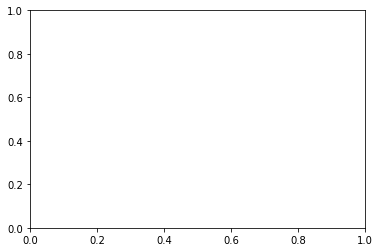

In [36]:
fig, ax = plt.subplots()
plt.show()

Suppose we wish to visualize the total spend by recipient parent company. This information is given in the `my_data` object that was created in the previous section. The following code block use the *Parent Company* column to create a list of labels (`x_labels`) and a list of integers that we will use to specify the index of each company (`x_vals`).

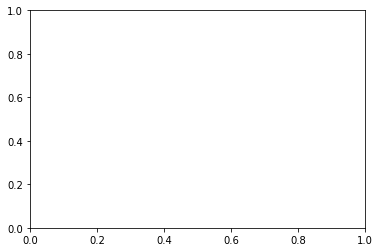

In [37]:
x_vals = list(np.arange(len(my_data['Parent Company'])))
x_labels = list(my_data['Parent Company'].values)

fig, ax = plt.subplots()
plt.show()

The following code block uses the `my_data` object and our list of index values (`x_vals`) to create a simple bar plot that shows the total spend as a percentage.

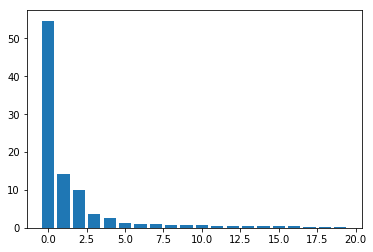

In [38]:
x_vals = list(np.arange(len(my_data['Parent Company'])))
x_labels = list(my_data['Parent Company'].values)

fig, ax = plt.subplots()

ax.bar(x_vals, 100*my_data['Total Spend'])
plt.show()

The following code block shows how we may specify additional attributes of the `ax` object to add titles and labels to our plot. It also shows how we can use the `figsize` argument of the `subplots` method.

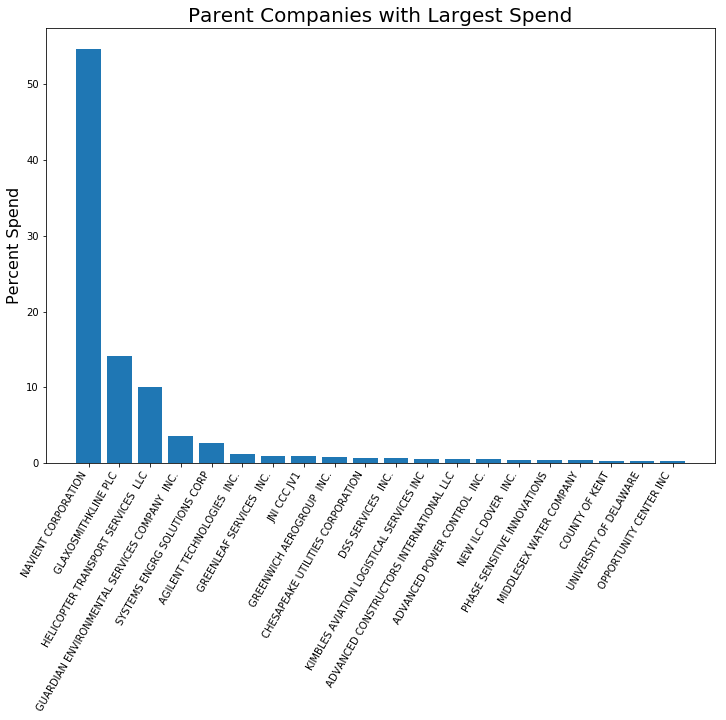

In [39]:
x_vals = list(np.arange(len(my_data['Parent Company'])))
x_labels = list(my_data['Parent Company'].values)

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(x_vals, 100*my_data['Total Spend'])
ax.set_title(f'Parent Companies with Largest Spend', fontsize = 20)
ax.set_ylabel('Percent Spend', fontsize = 16)
ax.set_xticks(x_vals)
ax.set_xticklabels(x_labels, ha='right')  
for tick in ax.get_xticklabels():
    tick.set_rotation(60)

plt.show()

If we wanted to generate figures that show the total spend by various categories, it would be somewhat cumbersome if we relied on copying and pasting the previous code. Instead, it would be much simpler to define a function. The following code block defines such a function that performs the aggregation and plotting in one step. Actually, the function allows the user to specify whether or not they would like a plot to be generated.

In [40]:
def top_spend_by_category(data, by, agg_column, top_values = 20, include_plot = True):
    
    temp = data.groupby([by])[agg_column].agg('sum').reset_index()\
    .sort_values(agg_column, ascending = False).head(top_values)
    
    temp['Total Spend'] = temp[agg_column]/data[agg_column].sum() 
     
    if include_plot:
        x_vals = list(np.arange(len(temp[by])))
        x_labels = list(temp[by].values)

        fig, ax = plt.subplots(figsize = (10,6))

        ax.bar(x_vals, 100*temp['Total Spend'])
        ax.set_title(f'Total spend by {by}', fontsize = 20)
        ax.set_ylabel('Percent Spend', fontsize = 16)
        ax.set_xticks(x_vals)
        ax.set_xticklabels(x_labels, ha='right')  
        for tick in ax.get_xticklabels():
            tick.set_rotation(60)

        plt.show()     
    
    return temp

The following code block executes our function and generates the plot.

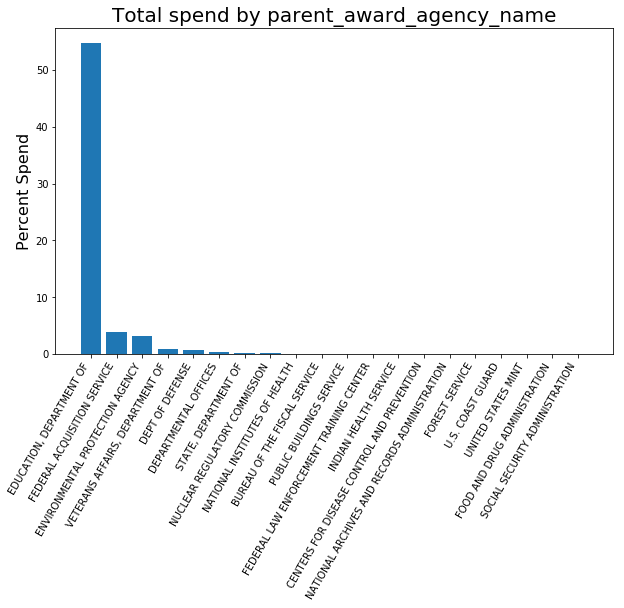

,parent_award_agency_name,current_total_value_of_award,Total Spend
6,"EDUCATION, DEPARTMENT OF","3,083,725,727.32",0.55
9,FEDERAL ACQUISITION SERVICE,"221,242,875.10",0.04
7,ENVIRONMENTAL PROTECTION AGENCY,"174,166,740.69",0.03
30,"VETERANS AFFAIRS, DEPARTMENT OF","48,209,451.09",0.01
5,DEPT OF DEFENSE,"42,717,901.68",0.01
4,DEPARTMENTAL OFFICES,"19,090,782.47",0.00
25,"STATE, DEPARTMENT OF","13,982,360.01",0.00
20,NUCLEAR REGULATORY COMMISSION,"6,022,106.71",0.00
19,NATIONAL INSTITUTES OF HEALTH,"2,510,867.33",0.00
2,BUREAU OF THE FISCAL SERVICE,"1,671,756.40",0.00


In [41]:
top_spend_by_category(data, 
                      'parent_award_agency_name', 
                      'current_total_value_of_award', 
                      top_values = 20, 
                      include_plot = True)

The following code block executes our function without generating the plot.

In [42]:
top_spend_by_category(data, 
                      'parent_award_agency_name', 
                      'current_total_value_of_award', 
                      top_values = 20, 
                      include_plot = False)

,parent_award_agency_name,current_total_value_of_award,Total Spend
6,"EDUCATION, DEPARTMENT OF","3,083,725,727.32",0.55
9,FEDERAL ACQUISITION SERVICE,"221,242,875.10",0.04
7,ENVIRONMENTAL PROTECTION AGENCY,"174,166,740.69",0.03
30,"VETERANS AFFAIRS, DEPARTMENT OF","48,209,451.09",0.01
5,DEPT OF DEFENSE,"42,717,901.68",0.01
4,DEPARTMENTAL OFFICES,"19,090,782.47",0.00
25,"STATE, DEPARTMENT OF","13,982,360.01",0.00
20,NUCLEAR REGULATORY COMMISSION,"6,022,106.71",0.00
19,NATIONAL INSTITUTES OF HEALTH,"2,510,867.33",0.00
2,BUREAU OF THE FISCAL SERVICE,"1,671,756.40",0.00


Finally, the following code block shows how we can use the `interact` method available from the `ipywidgets` package to generate an interactive visualization. The comments in the cell indicate what is happening at each step.

In [43]:
# The following list defines columns in the data
# that we would like to be available for grouping
category_list = ['parent_award_agency_name',
                 'awarding_agency_name',
                 'awarding_sub_agency_name',
                 'recipient_name',
                 'recipient_parent_name',
                 'type_of_contract_pricing',
                 'solicitation_procedures',
                 'naics_description',
                 'place_of_manufacture']

# The following line imports the interact
# method from the ipywidgets package
from ipywidgets import interact

# The following line essentially states that we would like to
# create an interactive widget where an argument named category
# can be selected from the previously defined category_list
@interact(category = category_list)

# This defines our interactive function. This function will be ran
# whenever our category selection is changed. We initialize
# the category argument to the first item in our category_list
def interactive_spend_analysis(category = category_list[0]):
    
    # The following lines call our top_spend_by_category
    # function with the current category as the grouping 
    # column
    top_spend_by_category(data,
                          category, 
                          'current_total_value_of_award', 
                          top_values = 20, 
                          include_plot = True)

interactive(children=(Dropdown(description='category', options=('parent_award_agency_name', 'awarding_agency_n…